In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
def plot(method, sz, agents, eps):
    means = []
    ste = []
    for i in sz:
        o = np.load(f"logs/results/results_nagents_{agents}_numeps_{eps}_nfaulty_{i}_faultytype_randomobs_method_{method}.npy")
        m = np.abs((o[0, :, 0] - o[1, :, 0])).mean()
        se = stats.sem(np.abs((o[0, :, 0] - o[1, :, 0])))
        means.append(m)
        ste.append(se)
    means = np.array(means)
    ste = np.array(ste)
    plt.plot(sz, means, label=method)
    plt.fill_between(sz, means+ste, means-ste, alpha=0.1)

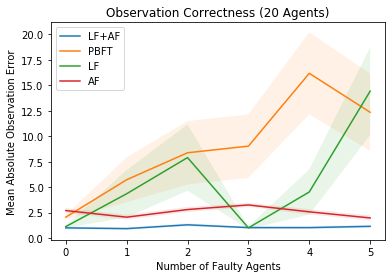

In [6]:
plot("LF+AF", list(range(6)), 20, 40)
plot("PBFT", list(range(6)), 20, 40)
plot("LF", list(range(6)), 20, 40)
plot("AF", list(range(6)), 20, 40)
plt.legend()
plt.xlabel("Number of Faulty Agents")
plt.ylabel("Mean Absolute Observation Error")
plt.title("Observation Correctness (20 Agents)")
plt.savefig("ims/correctness_20a.png")

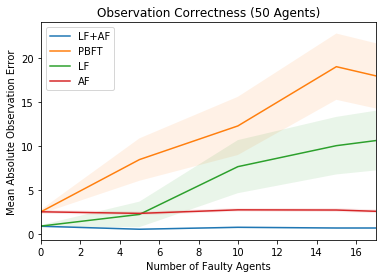

In [9]:
plot("LF+AF", list(range(0, 51, 5)), 50,50)
plot("PBFT", list(range(0, 51, 5)), 50,50)
plot("LF", list(range(0, 51, 5)), 50,50)
plot("AF", list(range(0, 51, 5)), 50,50)
plt.legend()
plt.xlim(0, 17)
plt.xlabel("Number of Faulty Agents")
plt.ylabel("Mean Absolute Observation Error")
plt.title("Observation Correctness (50 Agents)")
plt.savefig("ims/correctness_50a.png")

# Miniworld


In [50]:
def plot(method, sz, agents, eps):
    means = []
    ste = []
    for i in sz:
        o = np.load(f"logs/results/miniworld_results_nagents_{agents}_numeps_{eps}_nfaulty_{i}_faultytype_randomobs_method_{method}.npy")
        print(o.shape)
        for j in range(eps):
            plt.imsave(f"ims/{method}_f_{i}_{j}.png", o[0, j].reshape(60, 80, 3).astype(np.uint8))
            plt.show()
        o = o[0].mean(1)
        print(o.shape)
        m = (o == 0).mean()
        se = stats.sem(1*(o == 0))
        print(m, se)
        means.append(m)
        ste.append(se)
    means = np.array(means)
    ste = np.array(ste)
#     plt.errorbar(x = sz, y = means, yerr= ste, label=method)
#     plt.fill_between(sz, means+ste, means-ste, alpha=0.1)

In [51]:
plot("LF+AF", list(range(0, 2, 1)), 5, 10)
plot("PBFT", list(range(0, 2, 1)), 5, 10)
# plt.legend()
# plt.xlabel("Number of Faulty Agents")
# plt.ylabel("% of Faulty Observations")
# plt.title("Observation Correctness (5 Agents)")
# plt.savefig("ims/miniworld_correctness_5.png")

(1, 10, 14400)
(10,)
0.0 0.0
(1, 10, 14400)
(10,)
0.0 0.0
(1, 10, 14400)
(10,)
0.0 0.0
(1, 10, 14400)
(10,)
0.3 0.15275252316519464
